This notebook demostrates how to load the Hyper-Skin data.

In [9]:
from hsiData import HyperSkinData

import torch
import torchvision
from torchvision import transforms

import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data_dir = 'ICASSP2024-SPGC/Hyper-Skin(RGB,VIS)'
rgb_dir = f'{data_dir}/train/RGB_CIE'
vis_dir = f'{data_dir}/train/VIS'

In [3]:
train_dataset = HyperSkinData.Load_rgbvis(
    hsi_dir = vis_dir,
    rgb_dir = rgb_dir, 
)

In [4]:
# examine the available cube files in the dataset
# note I only include one data in the train folder for demonstration purpose
# for your case, you should expect a list of files with ICASSP2024-SPGC dataset
train_dataset.cube_files

array(['ICASSP2024-SPGC/Hyper-Skin(RGB,VIS)/train/VIS\\p001_neutral_front.mat'],
      dtype='<U68')

In [7]:
# load the hsi cube spanning the vis spectrum
cube = train_dataset.loadCube(train_dataset.cube_files[0])
cube.shape

(1024, 1024, 31)

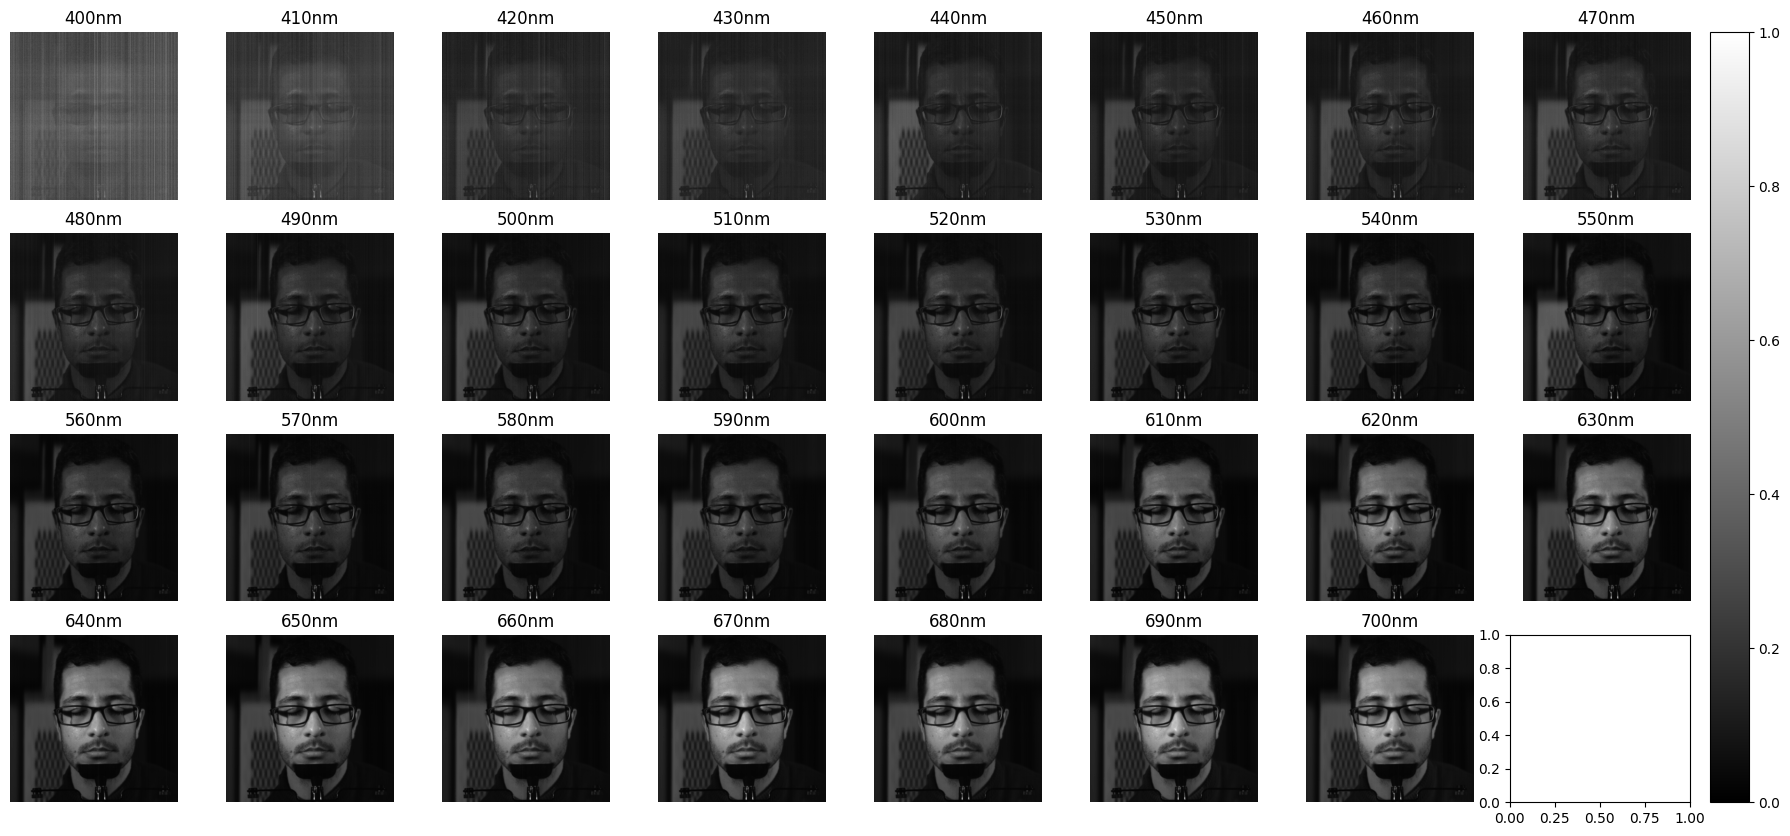

In [10]:
# visualize the 31 bands
band_31 = np.arange(400,710, 10)
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(26, 10))
for i, ax in enumerate(axes.flat[:-1]):
    im = ax.imshow(cube[:, :, i], vmin=0, vmax=1, cmap='gray')
    ax.axis('off')
    ax.set_title(f"{band_31[i]}nm")
fig.colorbar(im, ax=axes.ravel().tolist(), pad = 0.01)
plt.show()

In [13]:
# load the data and transform to pytorch tensor format
train_transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = HyperSkinData.Load_rgbvis(
    hsi_dir = vis_dir,
    rgb_dir = rgb_dir, 
    transform = train_transform
)

train_loader = torch.utils.data.DataLoader(
                    dataset = train_dataset, 
                    batch_size = 1, 
                    shuffle = True, 
                    pin_memory = True, 
                    drop_last = True)

In [14]:
x, y = next(iter(train_loader))
x.shape, y.shape

(torch.Size([1, 3, 1024, 1024]), torch.Size([1, 31, 1024, 1024]))